In [1]:
import functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = functions.generate_data(100, 2, 2, 0.5, 10)

No handles with labels found to put in legend.


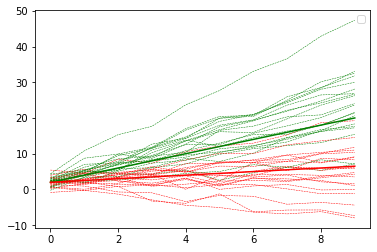

In [4]:
data_ = data[0]
for i in range(20):
    plt.plot(range(10), data_[i], linestyle='dashed', color='green', linewidth="0.5")
    plt.plot(range(10), data_[99-i], linestyle='dashed', color='red', linewidth="0.5")
plt.plot(range(10), [2 + 2 * t for t in range(10)], color="green")
plt.plot(range(10), [2 + 0.5 * t for t in range(10)], color="red")

plt.legend()
plt.show()

In [9]:
CCA_RMSE = []
for p in [0.01, 0.05, 0.1, 0.15, 0.2]:
    mse_list = []
    for i in range(50):
        data = functions.generate_data(100, 2, 2, 0.5, 10)
        data_MCAR = functions.generate_data_MCAR(data, p)
        data_CCA = functions.CCA(data)
        mse_list.append(functions.RNN_MSE(data_CCA))
    CCA_RMSE.append(np.mean(mse_list))    

    

Epoch 1/10
3/3 [==============================] - 1s 4ms/step - loss: 0.6936 - accuracy: 0.5625
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.5750
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.5875
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.6125
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.6250
Epoch 6/10
3/3 [==============================] - 0s 7ms/step - loss: 0.6456 - accuracy: 0.6250
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6381 - accuracy: 0.6125
Epoch 8/10
3/3 [==============================] - 0s 6ms/step - loss: 0.6323 - accuracy: 0.6500
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.6625
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.6750
Epoch 1/10
3/3 [=======================

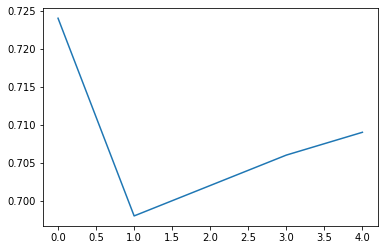

In [12]:
plt.plot(CCA_RMSE)

In [92]:
def mask_data_mnar(X, prob1=0.2, prob2=0.5):
  X = X.copy()
  n = len(X)
  p = len(X[0])
  m = np.median(X)
  mask = []
  for i in range(n):
    mask_line = []
    for j in range(p):
      if(X[i,j]<= m):
        arr = np.random.binomial(n=1,p=prob1,size=1).astype(bool)
      else:
        arr = np.random.binomial(n=1,p=prob2,size=1).astype(bool)
    
      mask_line = np.append(mask_line, arr)
    mask.append(mask_line)

  X[np.array(mask).astype(bool)]=None
  return X

In [42]:
from sklearn.datasets import make_classification
import numpy as np

In [98]:
X, y = make_classification(n_samples=1000, n_informative=5, n_features=5, n_redundant=0)


In [99]:
X_mis = mask_data_mnar(X)
X_mis

array([[        nan,  1.13168626,  1.59897995,         nan, -2.20634297],
       [ 2.59282779,         nan,         nan,         nan,  0.55148855],
       [-1.7314184 ,  1.94676514,  0.60551013,  0.46115396, -2.67940811],
       ...,
       [-0.28679345, -1.61535424,  1.11886124,         nan,  2.01359942],
       [        nan,         nan,  1.27038838,         nan, -1.50447987],
       [        nan,         nan,         nan, -1.03740833, -4.10755523]])

In [100]:
np.count_nonzero(np.isnan(X_mis[:,0]))

376

In [102]:
np.median(X)

0.3738450492422822

In [103]:
np.nanmedian(X_mis)

-0.0417673479068158